In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
#Loading the data
df = pd.read_csv('WA_Fn_UseC_Telco-Customer-Churn.csv')

In [42]:
#viewing the top 5 rows of dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
#Checking the dimensions of the data
df.shape

(7043, 21)

In [44]:
#checking the type of data under each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
#converting datatype under 'TotalCharges' from object to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [46]:
#checking whether data under 'TotalCharges' is converted from object to float64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
#Checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [48]:
#dropping the null values
df = df.dropna()

In [49]:
#Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
df.shape

(7032, 21)

In [51]:
#descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [52]:
#Dropping CustomerID column as it is not useful
df.drop('customerID', axis = 1, inplace = True)

In [53]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


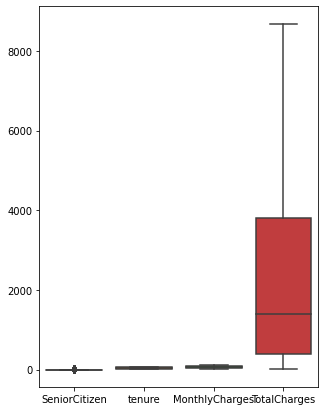

In [54]:
#checking for outliers using boxplot
plt.figure(figsize = (5,7))
sns.boxplot(data = df)

**Lable Encoding**: We need to encode our target variable 'Churn' as it is a catogorical variable.

In [55]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Churn']  = label.fit_transform(df['Churn'])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [56]:
#Seperating data into X and Y
x1 = df.drop(['Churn'], axis = 1)
y = df[["Churn"]]

In [57]:
x1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [58]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In this dataset we have lot of categorical input variables and hence we need to convert those categories into numbers which can be done by "One Hot Encoding" which is available in Sklearn library.

In [59]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder = "passthrough")

x = transformer.fit_transform(x1)
print(x)



[[1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0000e+00 2.9850e+01 2.9850e+01]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 3.4000e+01 5.6950e+01 1.8895e+03]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 2.0000e+00 5.3850e+01 1.0815e+02]
 ...
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.1000e+01 2.9600e+01 3.4645e+02]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 4.0000e+00 7.4400e+01 3.0660e+02]
 [0.0000e+00 1.0000e+00 1.0000e+00 ... 6.6000e+01 1.0565e+02 6.8445e+03]]


In [61]:
x.shape

(7032, 45)

In [62]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 15)

In [63]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

#Model Building using different Algorithms

#Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

In [69]:
logreg_model.fit(x_train,y_train)

LogisticRegression()

In [70]:
#Prediction on test data
y_pred = logreg_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

**Model Evaluation with Logistic Regression**

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1175  117]
 [ 214  252]]


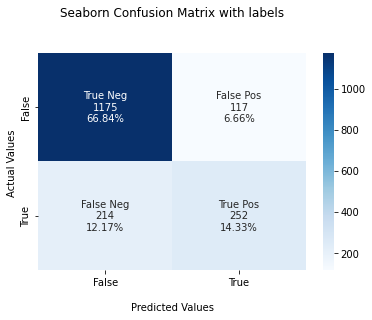

In [74]:
#Confusion Matrix visually
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [91]:
#Model Performance Metrics
print("Model Performance Parameters with Logistic Regression:",'\n')
ac = accuracy_score(y_test,y_pred)
print('accuracy score', ac)

rc = recall_score(y_test,y_pred)
print('recall score', rc)

pc = precision_score(y_test,y_pred)
print('precision score', pc)

f1sc = f1_score(y_test,y_pred)
print('f1 score', f1sc)

roc = roc_auc_score (y_test,y_pred)
print ('roc_auc_score', roc)

Model Performance Parameters with Logistic Regression: 

accuracy score 0.7866894197952219
recall score 0.37124463519313305
precision score 0.6784313725490196
f1 score 0.47988904299583907
roc_auc_score 0.6538885714665356


#Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [85]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [86]:
#Prediction on test data
y_pred = dt_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

**Model Evaluation with Decision Tree**

In [87]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1210   82]
 [ 293  173]]


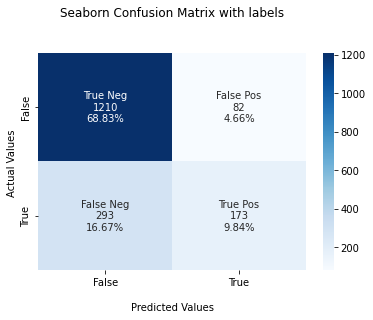

In [88]:
#Confusion Matrix visually
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [92]:
#Model Performance Metrics
print("Model Performance Parameters with Decision Tree:",'\n')
ac = accuracy_score(y_test,y_pred)
print('accuracy score', ac)

rc = recall_score(y_test,y_pred)
print('recall score', rc)

pc = precision_score(y_test,y_pred)
print('precision score', pc)

f1sc = f1_score(y_test,y_pred)
print('f1 score', f1sc)

Model Performance Parameters with Decision Tree: 

accuracy score 0.7866894197952219
recall score 0.37124463519313305
precision score 0.6784313725490196
f1 score 0.47988904299583907


#Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=15, criterion='entropy', random_state=20)

In [124]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=20)

In [125]:
#Prediction on test data
y_pred = rf_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

**Model Evaluation with Random Forest**

In [126]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1159  133]
 [ 252  214]]


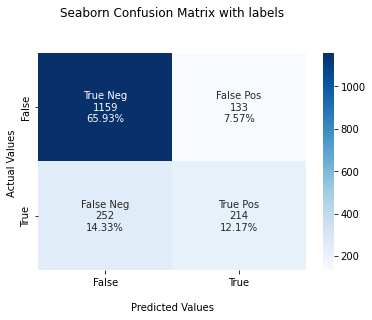

In [127]:
#Confusion Matrix visually
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [128]:
#Model Performance Metrics
print("Model Performance Parameters with Random Forest:",'\n')
ac = accuracy_score(y_test,y_pred)
print('accuracy score', ac)

rc = recall_score(y_test,y_pred)
print('recall score', rc)

pc = precision_score(y_test,y_pred)
print('precision score', pc)

f1sc = f1_score(y_test,y_pred)
print('f1 score', f1sc)

Model Performance Parameters with Random Forest: 

accuracy score 0.7810011376564278
recall score 0.4592274678111588
precision score 0.6167146974063401
f1 score 0.5264452644526445


#SVM

In [129]:
from sklearn.svm import SVC
svc_model = SVC() 

In [130]:
svc_model.fit(x_train,y_train)

SVC()

In [131]:
#Prediction on test data
y_pred = svc_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

**Model Evaluation with SVC**

In [132]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1184  108]
 [ 240  226]]


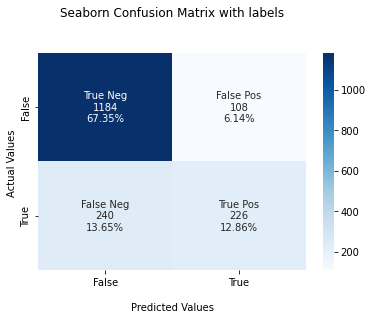

In [133]:
#Confusion Matrix visually
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [134]:
#Model Performance Metrics
print("Model Performance Parameters with SVM:",'\n')
ac = accuracy_score(y_test,y_pred)
print('accuracy score', ac)

rc = recall_score(y_test,y_pred)
print('recall score', rc)

pc = precision_score(y_test,y_pred)
print('precision score', pc)

f1sc = f1_score(y_test,y_pred)
print('f1 score', f1sc)

Model Performance Parameters with SVM: 

accuracy score 0.8020477815699659
recall score 0.48497854077253216
precision score 0.6766467065868264
f1 score 0.5650000000000001


**Applying GridSearchCV to SVC classifier algorithm**

In [135]:
param_grid = {'C' :[0.1,1,10,100,1000], 'gamma' :[0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

In [136]:
#cross-validation
from sklearn.model_selection import GridSearchCV

In [137]:
#an estimator like SVC and creates a new estimator that behaves exactly the same 
grid = GridSearchCV(SVC(),param_grid,refit = True,verbose = 3)

In [138]:
#fitting the grid into the training dataset
grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.764 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   1.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.781 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.7s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.819 total time=   0.7s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.791 total time=   0.7s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.791 total time=   0.7s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.735 total time=   0.7s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [139]:
#Inspecting best parameters and best estimators found by GridsearchCV
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [140]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [141]:
#Re-run predictions on this grid object 
grid_predictions = grid.predict(x_test)

In [142]:
#Model Performance Metrics
print("Model Performance Parameters with SVM after GridSerachCV:",'\n')
ac = accuracy_score(y_test,grid_predictions)
print('accuracy score', ac)

rc = recall_score(y_test,grid_predictions)
print('recall score', rc)

pc = precision_score(y_test,grid_predictions)
print('precision score', pc)

f1sc = f1_score(y_test,grid_predictions)
print('f1 score', f1sc)

Model Performance Parameters with SVM after GridSerachCV: 

accuracy score 0.8071672354948806
recall score 0.4978540772532189
precision score 0.6884272997032641
f1 score 0.5778331257783312
